In [1]:
import numpy as np
import os
import pickle
import matplotlib.cm as cm
import pandas as pd
import matplotlib.pyplot as plt
def moving_average(x,w):
    w_min=1#int(np.floor(w/2))
    return pd.Series(x).rolling(w, min_periods=w_min).mean()
av_window=10
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

save_dir = '/nese/mit/group/evlab/projects/Greta_Eghbal_manifolds/extracted/'

In [8]:
model_identifier= 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed_data_figure_3.pkl'
d_fig_3=pickle.load(open(os.path.join(save_dir,model_identifier),'rb'))
x_bar=d_fig_3['x_bar']

accuracies=d_fig_3['accuracies']
epoch_bar=d_fig_3['epoch_bar']
epoch_batch=d_fig_3['epoch_batch']
all_grads=d_fig_3['all_grad']
feat_size=d_fig_3['feat_size']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:155: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


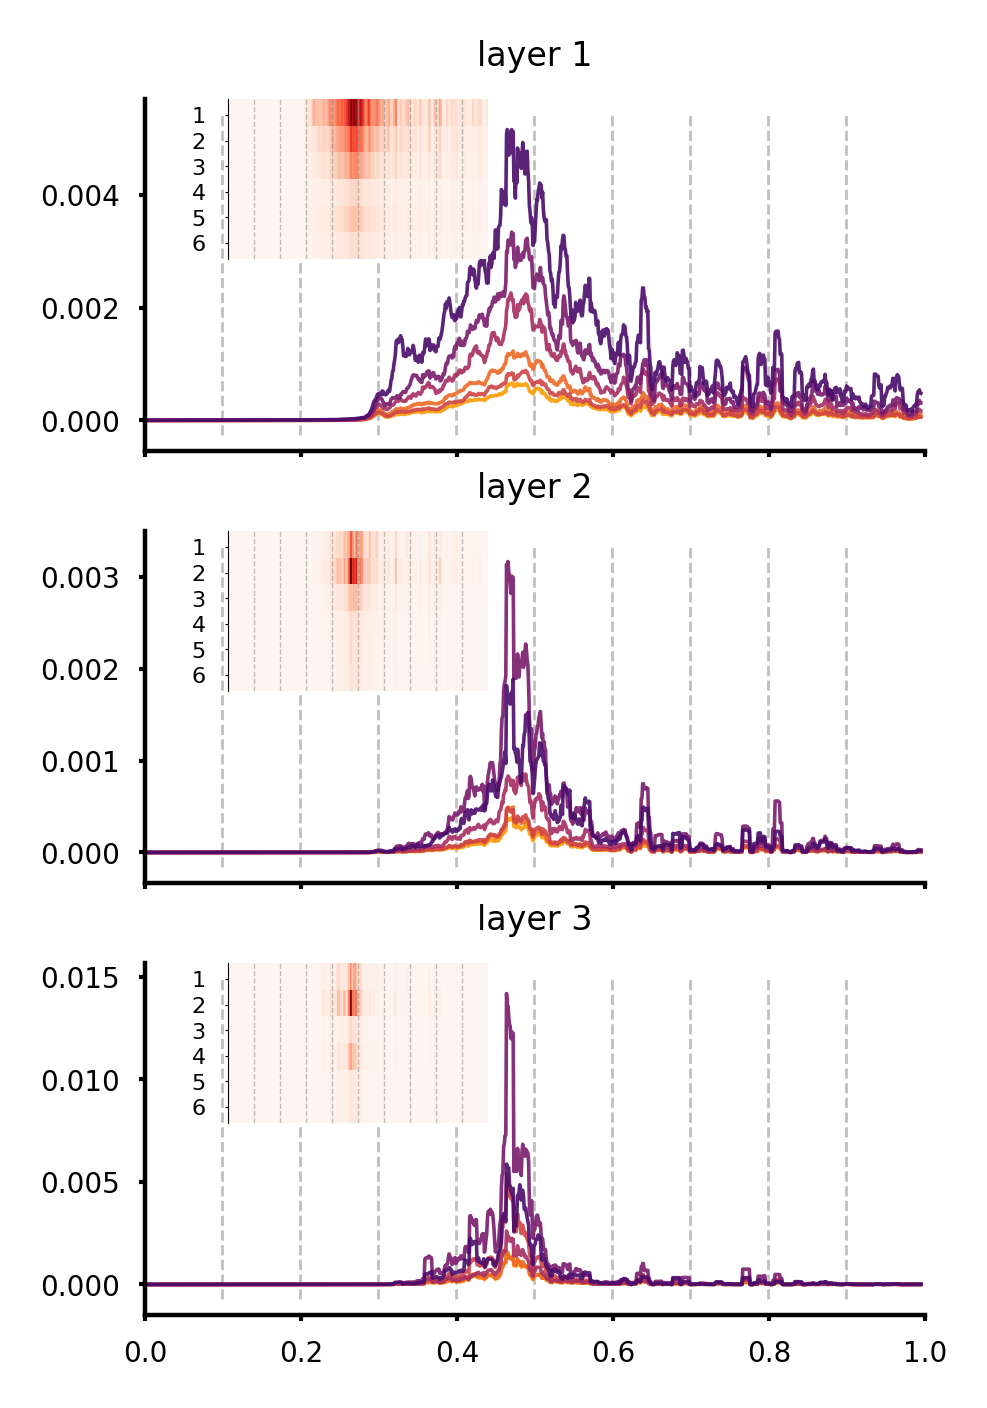

In [10]:

import matplotlib
matplotlib.rcParams['font.size'] = 5

av_window=10
xmin=0
xmax=1
num_colors=accuracies.shape[1]+2
color_fact=num_colors+2
h0=cm.get_cmap('inferno',color_fact)
line_cols=np.flipud(h0(np.arange(color_fact)/color_fact))
line_cols=line_cols[2:,:]

fig=plt.figure(1,figsize=(2.6,4),dpi=400,frameon=False)
mdl_idx=0

##########################################
layer_id=0
layer_res=all_grads[layer_id]
ax=plt.axes((.15,.63,.75,.22))
hier_all=[]
for idy,hier_keu in enumerate(layer_res):
        res=layer_res[hier_keu]
        ax.plot(moving_average(x_bar,av_window),moving_average(np.mean(res,axis=1)/np.sqrt(feat_size[layer_id]),av_window),label=f"H_{idy}",color=line_cols[idy,:],linewidth=.65,alpha=.9)
        hier_all.append(moving_average(np.mean(res,axis=1)/np.sqrt(feat_size[layer_id]),av_window))        
image_lims=np.where(np.multiply(np.asarray(moving_average(x_bar,av_window))>=xmin,np.asarray(moving_average(x_bar,av_window))<=xmax))
ax.set_title(f"layer {layer_id+1}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=False)
ax.set_xlim((xmin,xmax))
ax.axes.xaxis.set_ticklabels([])

ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)


ax=plt.axes((.23,.75,.25,.1))
full_stack=np.stack(hier_all)
ax.imshow(np.squeeze(full_stack[:,image_lims]),aspect='auto',interpolation='None',cmap='Reds',extent=[xmin,xmax,6,1])
ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(.2)

ax.tick_params(axis='x',direction='out', length=0, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.tick_params(axis='y',direction='out', length=.5, width=.2, colors='k',
               grid_color='k', grid_alpha=0.5)

ax.axes.yaxis.set_ticks(np.linspace(ax.get_ylim()[0]-.5,ax.get_ylim()[1]+.5,6))
ax.axes.yaxis.set_ticklabels(np.arange(6)+1,fontsize=4)
ax.axes.xaxis.set_ticklabels([])
ax.set_ylim((1,6))

ax.vlines(epoch_bar[epoch_bar<=xmax],ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.25,alpha=.5,zorder=5)


##########################################
layer_id=1
layer_res=all_grads[layer_id]
ax=plt.axes((.15,.63-.27,.75,.22))
hier_all=[]
for idy,hier_keu in enumerate(layer_res):
        res=layer_res[hier_keu]
        ax.plot(moving_average(x_bar,av_window),moving_average(np.mean(res,axis=1)/np.sqrt(feat_size[layer_id]),av_window),label=f"H_{idy}",color=line_cols[idy,:],linewidth=.65,alpha=.9)
        hier_all.append(moving_average(np.mean(res,axis=1)/np.sqrt(feat_size[layer_id]),av_window))        
image_lims=np.where(np.multiply(np.asarray(moving_average(x_bar,av_window))>=xmin,np.asarray(moving_average(x_bar,av_window))<=xmax))
ax.set_title(f"layer {layer_id+1}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=False)
ax.set_xlim((xmin,xmax))
ax.axes.xaxis.set_ticklabels([])

ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)

ax=plt.axes((.23,.63-.27+.12,.25,.1))
full_stack=np.stack(hier_all)
ax.imshow(np.squeeze(full_stack[:,image_lims]),aspect='auto',interpolation='None',cmap='Reds',extent=[xmin,xmax,6,1])
ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(.2)

ax.tick_params(axis='x',direction='out', length=0, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.tick_params(axis='y',direction='out', length=.5, width=.2, colors='k',
               grid_color='k', grid_alpha=0.5)

ax.axes.yaxis.set_ticks(np.linspace(ax.get_ylim()[0]-.5,ax.get_ylim()[1]+.5,6))
ax.axes.yaxis.set_ticklabels(np.arange(6)+1,fontsize=4)
ax.axes.xaxis.set_ticklabels([])
ax.set_ylim((1,6))


ax.vlines(epoch_bar[epoch_bar<=xmax],ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.25,alpha=.5,zorder=5)


##########################################
layer_id=2
layer_res=all_grads[layer_id]
ax=plt.axes((.15,.63-2*.27,.75,.22))
hier_all=[]
for idy,hier_keu in enumerate(layer_res):
        res=layer_res[hier_keu]
        ax.plot(moving_average(x_bar,av_window),moving_average(np.mean(res,axis=1)/np.sqrt(feat_size[layer_id]),av_window),label=f"H_{idy}",color=line_cols[idy,:],linewidth=.65,alpha=.9)
        hier_all.append(moving_average(np.mean(res,axis=1)/np.sqrt(feat_size[layer_id]),av_window))        
image_lims=np.where(np.multiply(np.asarray(moving_average(x_bar,av_window))>=xmin,np.asarray(moving_average(x_bar,av_window))<=xmax))
ax.set_title(f"layer {layer_id+1}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=False)
ax.set_xlim((xmin,xmax))
#ax.axes.xaxis.set_ticklabels([])

ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)

ax=plt.axes((.23,.63-2*.27+.12,.25,.1))
full_stack=np.stack(hier_all)
ax.imshow(np.squeeze(full_stack[:,image_lims]),aspect='auto',interpolation='None',cmap='Reds',extent=[xmin,xmax,6,1])
ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(.2)

ax.tick_params(axis='x',direction='out', length=0, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.tick_params(axis='y',direction='out', length=.5, width=.2, colors='k',
               grid_color='k', grid_alpha=0.5)

ax.axes.yaxis.set_ticks(np.linspace(ax.get_ylim()[0]-.5,ax.get_ylim()[1]+.5,6))
ax.axes.yaxis.set_ticklabels(np.arange(6)+1,fontsize=4)
ax.axes.xaxis.set_ticklabels([])
ax.set_ylim((1,6))
ax.vlines(epoch_bar[epoch_bar<=xmax],ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.25,alpha=.5,zorder=5)
#ax=plt.subplot(2,3,(7,8)
plt.tight_layout()